<a href="https://colab.research.google.com/github/EduHdzVillasana/UdemyDS/blob/main/Seccion%209/Clustering_Jer%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering jerárquico y dendrogramas
Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos 
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

(150, 2)


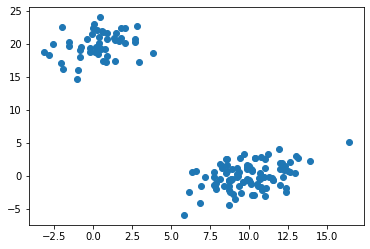

In [33]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [34]:
Z = linkage(X, "ward")

In [35]:
from scipy.cluster.hierarchy import cophenet #Coeficiente de coorrelación
from scipy.spatial.distance import pdist #distancia de datos

Coeficiente de coorrelación `cophenet`: compara las distancias dos a dos de las muestras con las que se llevaron a cabo en el clustering jerárquico. Cuanto mas cercano a uno mejor será el clustering

In [36]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [37]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [38]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [39]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [40]:
print(Z[152-len(X)])# cluster 152
print(Z[158-len(X)])#cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [41]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

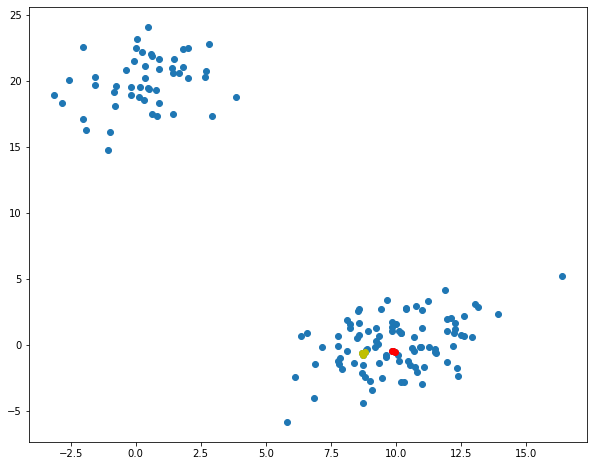

In [ ]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])##pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')##destacamos en rojo los puntos interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y')##destacamos en amarillo el segundo cluster
plt.show()

### Representación gráfica de un dendrograma

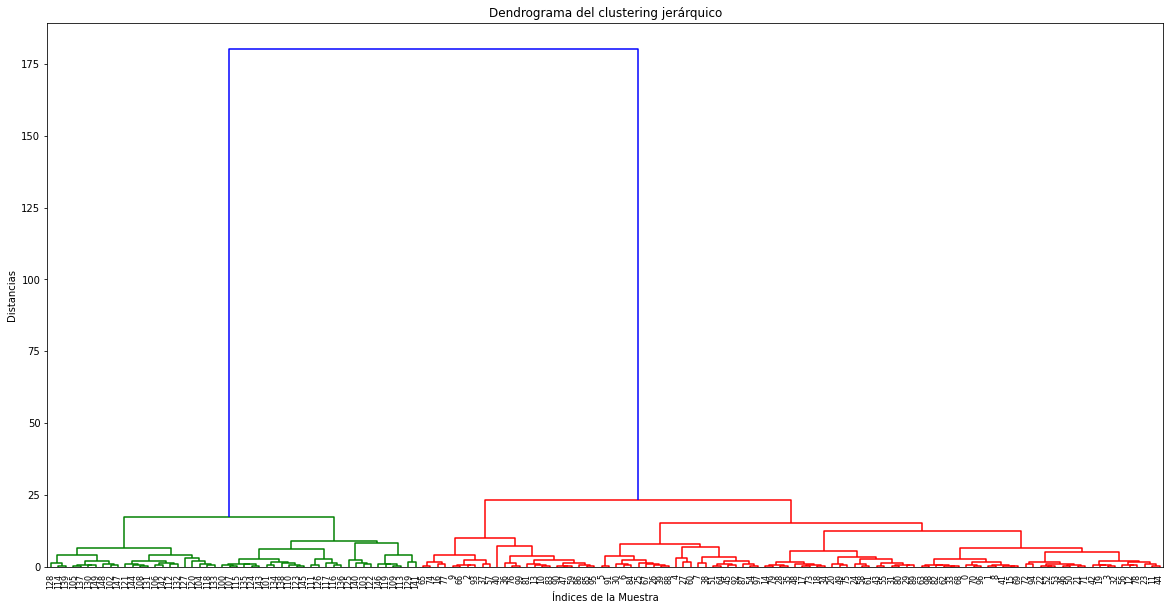

In [45]:
plt.figure(figsize=(20,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)# La distancia siempte será 70% de la distancia global (180)
plt.show()

In [44]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma

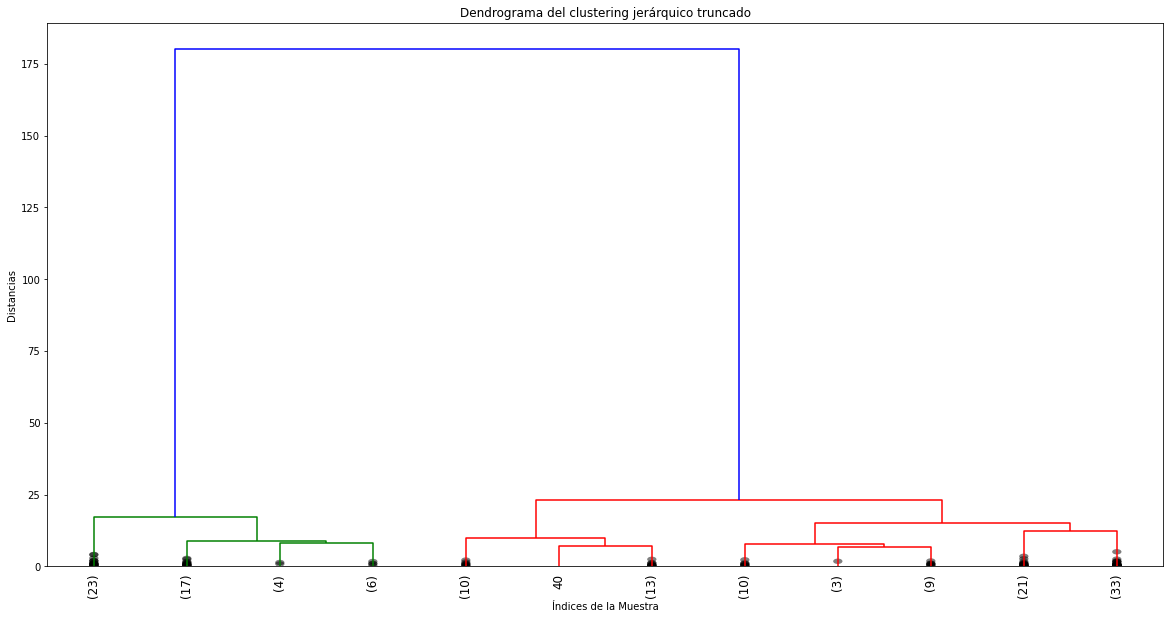

In [50]:
plt.figure(figsize=(20,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
plt.show()

Si el indice está en parentesis es la cantidad de elementos en el cluster, si no, es el indice del elemento.

### Dendrograma tuneado

In [51]:
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

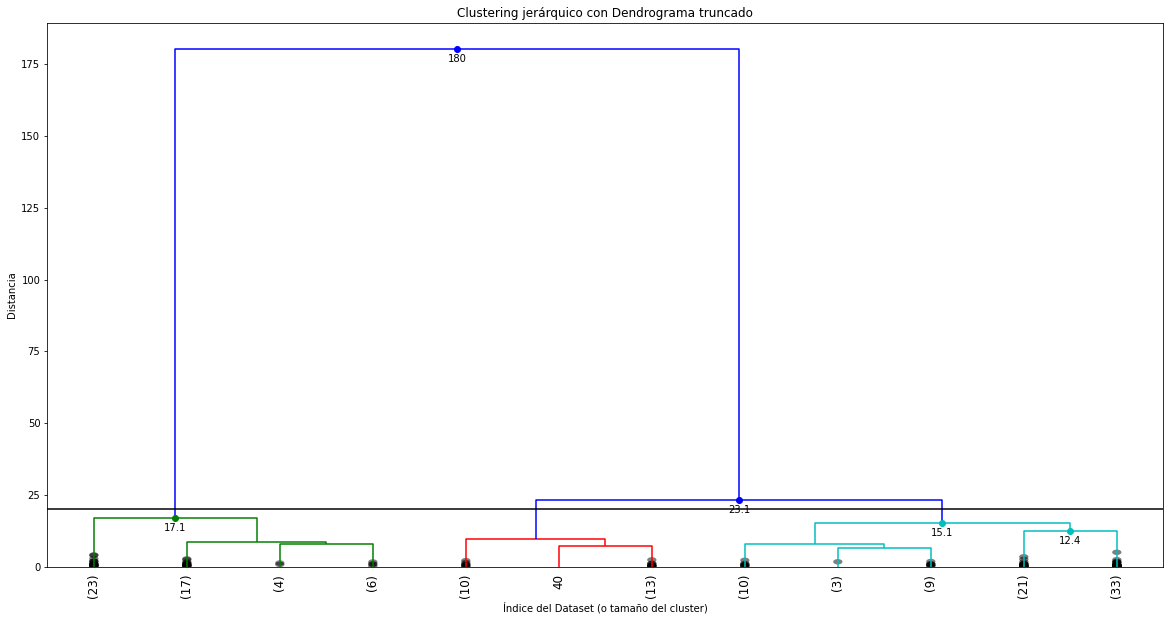

In [58]:
plt.figure(figsize=(20,10))
dendrogram_tune(Z, truncate_mode = "lastp", p = 12, leaf_rotation = 90., leaf_font_size = 12., show_contracted = True, annotate_above = 10, max_d = 20)
plt.show()

### Corte automático del dendrograma
inconsistency_i = (h_i-avg(h_j))/std(h_j)

In [ ]:
from scipy.cluster.hierarchy import inconsistent

In [ ]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

### Método del codo


[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


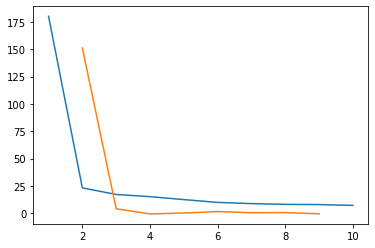

El número óptimo de cluster es 2


In [ ]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

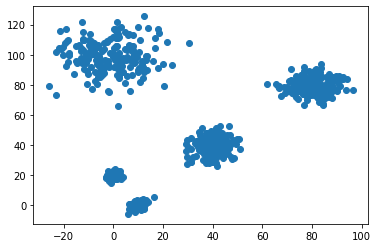

In [ ]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [ ]:
Z2 = linkage(X2,"ward")

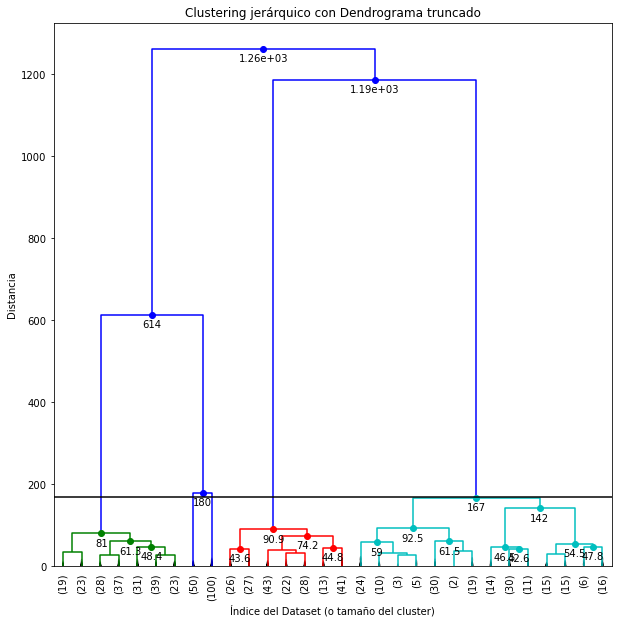

In [ ]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above = 40,
    max_d = 170
)

plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


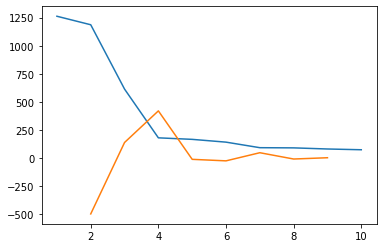

El número óptimo de cluster es 4


In [ ]:
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [ ]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


## Recuperar los clusters y sus elementos

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
max_d=25
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
k=2
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
fcluster(Z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

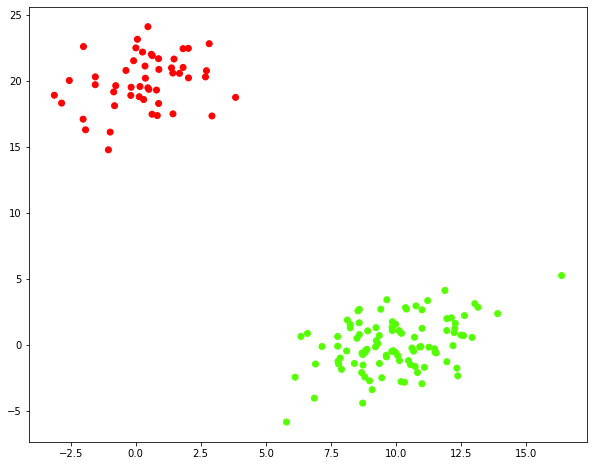

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()

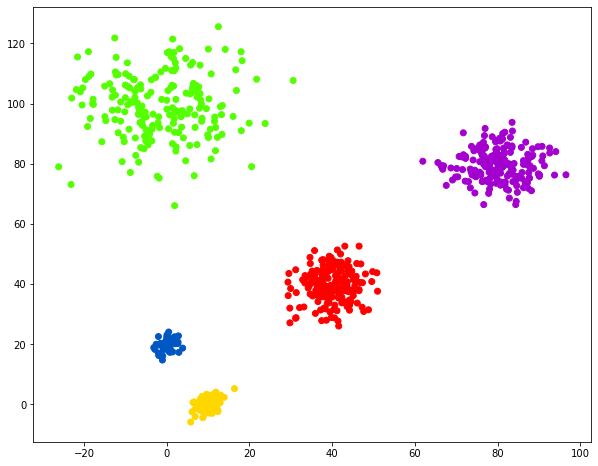

In [ ]:
max_d=170
clusters = fcluster(Z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap="prism")
plt.show()